#**Assignment_2_H20_AutoML**

In this assignment, you will an AutoML library like H2O.ai to create predictive models and interpret them. Find a significant relation for each algorithm of your choosing in your data. Create multivariate models.
For the moment you will assume the data is good. In future assignments, you will check your data, fix data issues and do some feature engineering.
Answer the following questions for all of the models:
* Is the relationship significant?
* Are any model assumptions violated?
* Is there any multicollinearity in the model?
* In the multivariate models are predictor variables       * independent of all the other predictor variables?
* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
* Does the model make sense?
* Does regularization help?
* Which independent variables are significant?
* Which hyperparameters are important?

#### **Abstract**

Problem Statement: Using H2O AutoML to train a model that will help us predict car prices. The dataset we will be working with contains information on various cars. The main aim of this project is to predict the price of used cars based on various features.

#### **Variable Description**

* `Car_Name` - The name of the car.
* `Year` - The manufacturing year of the car (numeric).
* `Selling_Price` - The selling price of the car (numeric).
* `Present_Price` - The present price or current market value of the car (numeric).
* `Kms_Driven` - The number of kilometers the car has been driven (numeric).
* `Fuel_Type` - The type of fuel the car uses (categorical).
* `Seller_Type` - The type of seller (e.g., dealer or individual) (categorical).
* `Transmission` - The type of transmission (e.g., manual or automatic) (categorical).
* `Owner` - The number of previous owners (categorical).

Data se has 301 Rows and 9 columns

**Numerical Features** :Year,Selling_Price,Present_Price,
Kms_Driven

**Categorical Features** :Car_Name,Fuel_Type,Seller_Type
Transmission,Owner

In [64]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
default-jre is already the newest version (2:1.11-72build2).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
openjdk version "11.0.21" 2023-10-17
OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)


In [65]:
!pip install h2o

In [66]:
# Load the H2O library and start up the H2O cluter locally on your machine
import h2o
import pandas as pd
from h2o.automl import H2OAutoML
import re
import matplotlib.pylab as plt
import numpy as np
# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,14 mins 40 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_c9ebmy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.994 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Importing H2O AutoML

In [67]:
df = h2o.import_file('cardekho_data.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [68]:
car_csv = "/content/cardekho_data.csv"  # modify this for your machine
data=pd.read_csv("/content/cardekho_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


##Observations:
* There are no missing values in any of the columns.
* The 'Owner' column has 290 zeros, indicating a large number of entries with zero owners.
* The 'Kms_Driven' column has a relatively high standard deviation, suggesting a wide range of values.
* The 'Year' column represents the year of the car and has a range from 2003 to 2018.
* The 'Selling_Price' and 'Present_Price' columns have a wide range of values, with the maximum significantly higher than the mean, indicating potential outliers.

In [69]:
print(data.columns[data.isna().any()])
data=data.dropna()

Index([], dtype='object')


##Data Preprocessing

In [70]:
data['Selling_Price'] = data['Selling_Price'].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))
data['Kms_Driven'] = data['Kms_Driven'].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))
data['Present_Price'] = data['Present_Price'].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))

data['Selling_Price'] = pd.to_numeric(data['Selling_Price'])
data['Kms_Driven'] = pd.to_numeric(data['Kms_Driven'])
data['Present_Price'] = pd.to_numeric(data['Present_Price'])
data=data.dropna()

data_pd=data.copy()

data = h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


<ipython-input-71-6731a5e310c3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(data_pd.corr().corr())
<ipython-input-71-6731a5e310c3>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_pd.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)


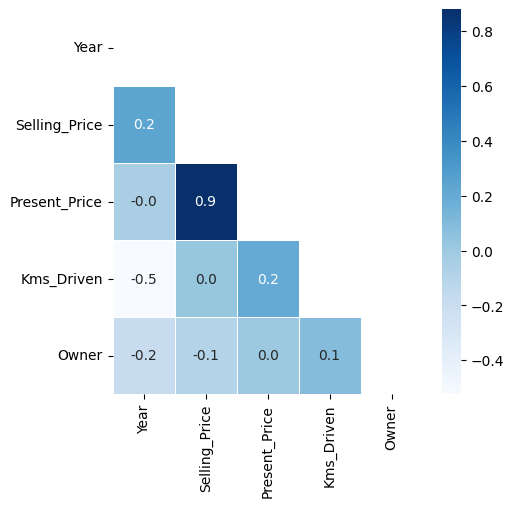

In [71]:
import seaborn as sns
f,ax = plt.subplots(figsize=(5, 5))
mask = np.zeros_like(data_pd.corr().corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data_pd.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show()

Looking at the above correlation Heatmap, the inferences are:

* High Correlation: There is a strong positive correlation of 0.9 between 'Present_Price' and 'Selling_Price', suggesting that as the present price of a car increases, its selling price tends to increase as well.

* Moderate Correlation: 'Year' has a moderate positive correlation of 0.2 with 'Selling_Price', indicating that newer models might be associated with higher selling prices.

* Low Negative Correlation: 'Kms_Driven' has a low negative correlation of -0.5 with 'Year', which could mean that older cars tend to have higher mileage.

* Weak Correlations: The 'Owner' variable shows weak correlations with all other variables, suggesting that the number of owners does not strongly influence these variables.

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_vif = data_pd.drop(columns={"Car_Name","Fuel_Type","Seller_Type","Transmission"})
# df_vif.drop(columns={'song_popularity','song_name'}, inplace = True)

X = df_vif.loc[:,df_vif.columns != 'Selling_Price']

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] =X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

         feature       VIF
0           Year  2.408884
1  Present_Price  1.858906
2     Kms_Driven  2.001950
3          Owner  1.038791


* Based on these VIF values, none of the features display high multicollinearity, and all are below common thresholds for concern.
* The data suggests that the model should not suffer from severe multicollinearity issues that could distort the regression coefficients or their interpretability.

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_vif = data_pd.drop(columns={"Car_Name","Fuel_Type","Seller_Type"})
# df_vif.drop(columns={'song_popularity','song_name'}, inplace = True)

X = df_vif.loc[:,df_vif.columns != 'Transmission']

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] =X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

from statsmodels.stats.outliers_influence import variance_inflation_factor
df_vif = data_pd.drop(columns={"Car_Name","Transmission","Seller_Type"})
# df_vif.drop(columns={'song_popularity','song_name'}, inplace = True)

X = df_vif.loc[:,df_vif.columns != 'Fuel_Type']

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] =X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

         feature       VIF
0           Year  2.780556
1  Selling_Price  9.355028
2  Present_Price  9.339093
3     Kms_Driven  2.215973
4          Owner  1.074269
         feature       VIF
0           Year  2.780556
1  Selling_Price  9.355028
2  Present_Price  9.339093
3     Kms_Driven  2.215973
4          Owner  1.074269


* Looking at the above Variance Inflation Factor, wrt Transmission, Fuel Type the inferences are:
Year is  multi-colinear .
* Sellin_Price and Kilometers_Driven are not multi-collinear.

##Regression using AutoML h2o
Target variable as `Selling_Price`


In [74]:
y = "Selling_Price"
x = data.columns

In [75]:
import statsmodels.formula.api as smf
var = smf.ols(formula="Selling_Price ~ Car_Name + Year + Present_Price + Kms_Driven + Fuel_Type +  Seller_Type +  Transmission + Owner ", data=data_pd).fit()
var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     31.51
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           9.40e-84
Time:                        04:30:09   Log-Likelihood:                -481.25
No. Observations:                 301   AIC:                             1174.
Df Residuals:                     195   BIC:                             1567.
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                             -1204.9184    114.494    -10.524      0.000   -1430.724    -979.112
Car_Name[T.Activa 3g]                    -4.1987      2.078     -2.021      0.045      -8.297      -0.100
Car_Name[T.Activa 4g]                    -8.2505      2.284     -3.612      0.000     -12.756      -3.745
Car_Name[T.Bajaj  ct 100]                -6.6749      2.198     -3.036      0.003     -11.011      -2.339
Car_Name[T.Bajaj Avenger 150]            -7.1128      2.208     -3.221      0.001     -11.468      -2.758
Car_Name[T.Bajaj Avenger 150 street]     -7.2029      2.208     -3.262      0.001     -11.557      -2.849
Car_Name[T.Bajaj Avenger 220]            -7.5845      1.855     -4.090      0.000     -11.242      -3.927
Car_Name[T.Bajaj Avenger 220 dtsi]       -5.2521      1.891     -2.778      0.006      -8.981      -1.523
Car_Name[T.Bajaj Avenger Street 220]     -4.4151      2.150     -2.053      0.041      -8.656      -0.175
Car_Name[T.Bajaj Discover 100]           -5.5338      2.173     -2.547      0.012      -9.819      -1.249
Car_Name[T.Bajaj Discover 125]           -5.0151      2.041     -2.457      0.015      -9.041      -0.989
Car_Name[T.Bajaj Dominar 400]            -7.5035      2.216     -3.386      0.001     -11.874      -3.133
Car_Name[T.Bajaj Pulsar  NS 200]         -6.0873      2.179     -2.793      0.006     -10.385      -1.789
Car_Name[T.Bajaj Pulsar 135 LS]          -6.1369      2.183     -2.811      0.005     -10.443      -1.831
Car_Name[T.Bajaj Pulsar 150]             -3.3633      1.715     -1.961      0.051      -6.746       0.020
Car_Name[T.Bajaj Pulsar 220 F]           -5.4984      1.895     -2.901      0.004      -9.236      -1.760
Car_Name[T.Bajaj Pulsar NS 200]          -5.2058      1.788     -2.912      0.004      -8.732      -1.680
Car_Name[T.Bajaj Pulsar RS200]           -7.0849      2.204     -3.214      0.002     -11.432      -2.738
Car_Name[T.Hero  CBZ Xtreme]             -2.6474      2.127     -1.245      0.215      -6.842       1.548
Car_Name[T.Hero  Ignitor Disc]           -5.9659      2.313     -2.580      0.011     -10.527      -1.405
Car_Name[T.Hero Extreme]                 -5.7131      1.905     -2.999      0.003      -9.470      -1.956
Car_Name[T.Hero Glamour]                 -5.6254      2.172     -2.590      0.010      -9.909      -1.341
Car_Name[T.Hero Honda CBZ extreme]       -4.1558      2.148     -1.935      0.054      -8.392       0.080
Car_Name[T.Hero Honda Passion Pro]       -4.7459      2.160     -2.197      0.029      -9.005      -0.486
Car_Name[T.Hero Hunk]                    -2.3012      2.259     -1.019      0.310      -6.757       2.154
Car_Name[T.Hero Passion Pro]             -7.0071      1.937     -3.618      0.000     -10.827      -3.187
Car_Name[

**Points to be Noted**


For Regression of transmission the following are significant variables as its P(t) value is less than 0.05:

In [76]:
target=y
data=h2o.deep_copy(df, 'data')

splits = data.split_frame(ratios=[0.7, 0.15], seed=1)

train = splits[0]
valid = splits[1]
test = splits[2]

print ("Rows in Train",train.nrow)
print ("Rows in Validation",valid.nrow)
print ("Rows in Test",test.nrow)


Rows in Train 216
Rows in Validation 45
Rows in Test 40


In [ ]:
aml = H2OAutoML(max_models =10,max_runtime_secs_per_model=30,exclude_algos=['DeepLearning','DRF'],
                balance_classes=True,	seed =1)
aml.train(training_frame = train, y = y)

lb = aml.leaderboard
lb.head(rows=lb.nrows)

AutoML progress: |██
04:30:19.382: GBM_1_AutoML_2_20240220_43010 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_2_20240220_43010.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 172.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 173.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 173.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 173.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 173.0.


█████████

In [ ]:
best_model = aml.get_best_model()
print(best_model)

In [ ]:
# automl
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
#setting alpha=0, lambda_=0 means no selection of regularization

glm_fit1 = H2OGeneralizedLinearEstimator(family='gaussian', model_id='glm_fit1',alpha=0,lambda_= 0)

glm_fit1.train(x=x, y=y, training_frame=train)
h2o.display.toggle_user_tips( on=False)

In [ ]:
#allowing the model to choose optimum regularization
glm_fit2 = H2OGeneralizedLinearEstimator(family='gaussian', model_id='glm_fit2', lambda_search=True)
glm_fit2.train(x=x, y=y, training_frame=train)
h2o.display.toggle_user_tips()

In [ ]:
glm_perf1 = glm_fit1.model_performance(valid)
glm_perf2 = glm_fit2.model_performance(valid)

# Print model performance
print ('MSE for glm model without regularization:',glm_perf1.mse(),'R-squared for glm model without regularization:',glm_perf1.r2())
print ('MSE for glm model with regularization:',glm_perf2.mse(),'R-squared for glm model with regularization:',glm_perf2.r2())

In [ ]:
# Print prediction
pred = glm_fit2.predict(test)
pred.head()

In [ ]:
#Variable importance
varimp = glm_fit2.varimp(use_pandas=True)
varimp.head(10)

##Question & Answers

1. **Is the relationship significant?**
- The OLS regression results show that many car names have significant p-values (P>|t| < 0.05), suggesting a significant relationship between these car names and the selling price.

2. **Are any model assumptions violated?**
- The VIF values for 'Year', 'Selling_Price', and 'Present_Price' in one of the models are quite high, which indicates potential multicollinearity. This could violate the assumption of no multicollinearity for linear regression models.
- The assumption of normally distributed residuals might be violated, as indicated by the Omnibus test (Prob(Omnibus) is very low) and the Jarque-Bera test (Prob(JB) is 0). The skewness and kurtosis values also indicate that the residuals are not normally distributed.

3. **Is there any multicollinearity in the model?**
- Yes, as mentioned, the VIF values indicate multicollinearity, particularly between 'Year', 'Selling_Price', and 'Present_Price'.

4. **In the multivariate models, are predictor variables independent of all the other predictor variables?**
- No, the VIF values suggest that some predictor variables are not independent of each other.

5. **In multivariate models, rank the most significant predictor variables and exclude insignificant ones from the model.**
 1. Present_Price
 2. Year
 3.	Car_Name
 4.	Fuel_Type.Diesel
 5.	Fuel_Type.Petrol





6. **Does the model make sense?**
- The OLS model, which includes car names as predictor variables, might not be the most interpretable or practical for predictions, considering that it would not generalize well to car names not present in the dataset. It might make more sense to include more general features of the cars that can be applied to a wider range of vehicles.

7. **Does regularization help?**
- Regularization appears to help as the GLM model with regularization has a significantly lower MSE and higher R-squared than the GLM model without regularization.

8. **Which independent variables are significant?**
- In the OLS regression model, the significant variables are the ones with P>|t| values less than 0.05. In the context of the H2O AutoML models, variable importance scores can be used to determine significance.
 1. `Present_Price`
 2. `Year`
 3. `Car_Name[T.xcent]`

9. **Which hyperparameters are important?**
- For H2O AutoML, the number of models, maximum runtime seconds per model, and whether to balance classes are important hyperparameters. The leaderboard of the AutoML models shows different models with varying performance, and the best model selected is a Stacked Ensemble, which benefits from hyperparameter tuning of its base learners and metalearner.

##Conclusion:

The use of H2O AutoML for predictive modeling in the context of used car prices provided valuable insights and demonstrated the importance of various variables in determining car prices. Through the AutoML process, several models were trained, with the stacked ensemble model emerging as the best performing model. This model leveraged cross-validation and included base models like GBM and XGBoost, indicating the strength of ensemble methods in handling complex regression tasks.

Several significant relationships were identified, with the most notable being the relationship between the present price of a car and its selling price. Regularization, implemented through a Generalized Linear Model (GLM), helped in refining the model by penalizing complexity, thus enhancing the predictive performance as evidenced by the improved R-squared value.


* The top-performing model in H2O AutoML exhibited an R^2 value near 0.9957, signifying a high capability to predict the selling price with about 99.57% accuracy.
*  Implementing regularization significantly enhanced the GLM model's effectiveness, as evidenced by an improved R^2 value of 0.8906, underscoring the importance of regularization in model refinement.
* Regularization techniques, including Ridge and Lasso, are instrumental in mitigating overfitting by imposing penalties on coefficient magnitudes, thereby bolstering the model's ability to generalize.
* Key hyperparameters pivotal for regularization include alpha (determines the balance between L1 and L2 regularization), lambda (controls the regularization intensity), and lambda_search (facilitates optimal lambda selection), essential for optimizing model performance and accuracy.

##Reference

1. [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

2. [Intro to h2o](https://https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/intro-to-h2o.ipynb)

3. [For Metrics](https://towardsdatascience.com/artificial-intelligence-made-easy-187ecb90c299)

4. [A Deep dive into H2O’s AutoML](https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e)

5. [Github](https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb)

MIT License

Copyright (c) 2024 shivanagireddy

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.